Atividade 1 - 'Pré-processamento (Transformação dos dados)Tarefa'  
Considere a base de dados Hotel Reservations  

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
  
Pede-se:  
1) Apresentar um mapa de calor (heatmap) entre todas as variáveis numéricas;
2) Efetuar as devidas transformações nos atributos categóricos;
3) Normalizar por Z-Score (Standard Scaler)
4) Utiliazando Group-by, responder as seguintes perguntas:
    * Apresentar os valores mínimo, máximo e média do preço das diárias (avg_price_per_room ) agrupados por tipo de quarto (room_type_reserved);
    * Apresentar os valor médio de adultos e crianças hospedados em 2017 e 2018.

Data Dictionary  
`Booking_ID`: unique identifier of each booking  
`no_of_adults`: Number of adults  
`no_of_children`: Number of Children  
`no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  
`no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  
`type_of_meal_plan`: Type of meal plan booked by the customer:  
`required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)  
`room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.  
`lead_time`: Number of days between the date of booking and the arrival date  
`arrival_year`: Year of arrival date  
`arrival_month`: Month of arrival date  
`arrival_date`: Date of the month  
`market_segment_type`: Market segment designation.  
`repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)  
`no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking  
`no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking  
`avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)  
`no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)  
`booking_status`: Flag indicating if the booking was canceled or not.  

### Importação das bibliotecas e dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../Atividades/dados/Hotel_Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.drop(columns='Booking_ID',axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [5]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Segundo o dicionário de dados, as colunas devem seguir os seguintes tipos:
* `type_of_meal_plan`, `required_car_parking_space`, `room_type_reserved`, `market_segment_type`, `repeated_guest`, `booking_status` --> Categóricas    
* `no_of_adults`, `no_of_children`, `no_of_weekend_nights`, `no_of_week_nights`, `lead_time`, `no_of_previous_cancellations`, `no_of_previous_bookings_not_canceled`, `avg_price_per_room`, `no_of_special_requests` --> Numéricas  
* `arrival_year`, `arrival_month`, `arrival_date` --> Data

### (1) Apresentar um mapa de calor (heatmap) entre todas as variáveis numéricas;

In [6]:
num_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

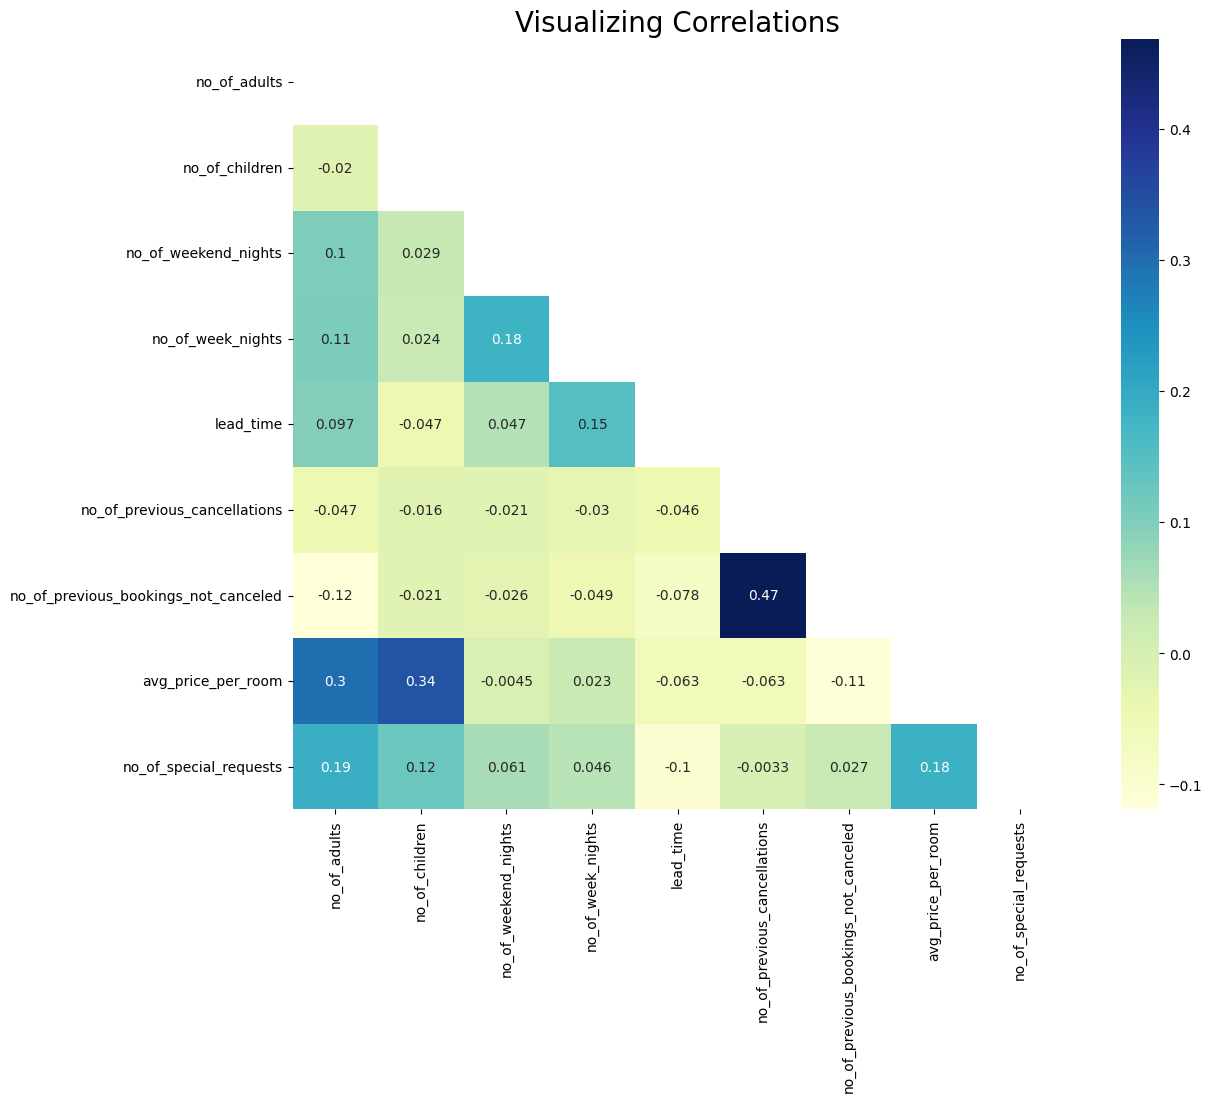

In [7]:
mask = np.triu(np.ones_like(df[num_features].corr()))
plt.figure(figsize = (15, 10))
sns.heatmap(df[num_features].corr(), cmap = 'YlGnBu', square = True, annot = True, mask = mask)
plt.title("Visualizing Correlations", size = 20)
plt.show()

Podemos perceber que Não existem correlações significativas entre os atributos numéricos, sendo o maior coeficiente 0.47, muito baixo para afirmarmos que existe algum grau de correlação. 

### (2) Efetuar as devidas transformações nos atributos categóricos;

In [8]:
cat_features = ['type_of_meal_plan', 'required_car_parking_space', 'market_segment_type', 'repeated_guest', 'booking_status']

In [9]:
df[cat_features].nunique()

type_of_meal_plan             4
required_car_parking_space    2
market_segment_type           5
repeated_guest                2
booking_status                2
dtype: int64

In [10]:
cat_features_2 = ["required_car_parking_space","repeated_guest", "booking_status"]
cat_features_more = ["type_of_meal_plan", "market_segment_type"]

In [11]:
# Atributos com dois valores:

labelencoder = LabelEncoder()
df[cat_features_2] = df[cat_features_2].apply(labelencoder.fit_transform)

In [12]:
# Atributos com  mais de dois valores:

for col in cat_features_more:
    df = pd.get_dummies(data=df, columns=[col])

In [13]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

### (3) Normalizar por Z-Score (Standard Scaler)

In [14]:
df_scaled = df.copy()

In [15]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [16]:
scaler = StandardScaler()
normalizacao = scaler.fit(df_scaled[num_features])
df_scaled[num_features] = normalizacao.transform(df_scaled[num_features])

In [17]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,4.270112e-17,1.000014,-3.556844,0.298893,0.298893,0.298893,4.154629
no_of_children,36275.0,1.518044e-17,1.000014,-0.261470,-0.261470,-0.261470,-0.261470,24.574456
no_of_weekend_nights,36275.0,9.950536e-17,1.000014,-0.931190,-0.931190,0.217401,1.365993,7.108950
no_of_week_nights,36275.0,-1.165466e-16,1.000014,-1.562353,-0.853578,-0.144803,0.563972,10.486819
required_car_parking_space,36275.0,3.098553e-02,0.173281,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,36275.0,6.463931e-17,1.000014,-0.991888,-0.794052,-0.328554,0.474428,4.163493
arrival_year,36275.0,2.017820e+03,0.383836,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,36275.0,7.423653e+00,3.069894,1.000000,5.000000,8.000000,10.000000,12.000000
arrival_date,36275.0,1.559700e+01,8.740447,1.000000,8.000000,16.000000,23.000000,31.000000
repeated_guest,36275.0,2.563749e-02,0.158053,0.000000,0.000000,0.000000,0.000000,1.000000


### (4) Utiliazando Group-by, responder as seguintes perguntas:
   * Apresentar os valores mínimo, máximo e média do preço das diárias (avg_price_per_room ) agrupados por tipo de quarto (room_type_reserved);
   * Apresentar os valor médio de adultos e crianças hospedados em 2017 e 2018.)

In [18]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,Room_Type 1,224,2017,10,2,...,1,True,False,False,False,False,False,False,True,False
1,2,0,2,3,0,Room_Type 1,5,2018,11,6,...,1,False,False,False,True,False,False,False,False,True
2,1,0,2,1,0,Room_Type 1,1,2018,2,28,...,0,True,False,False,False,False,False,False,False,True
3,2,0,0,2,0,Room_Type 1,211,2018,5,20,...,0,True,False,False,False,False,False,False,False,True
4,2,0,1,1,0,Room_Type 1,48,2018,4,11,...,0,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,Room_Type 4,85,2018,8,3,...,1,True,False,False,False,False,False,False,False,True
36271,2,0,1,3,0,Room_Type 1,228,2018,10,17,...,0,True,False,False,False,False,False,False,False,True
36272,2,0,2,6,0,Room_Type 1,148,2018,7,1,...,1,True,False,False,False,False,False,False,False,True
36273,2,0,0,3,0,Room_Type 1,63,2018,4,21,...,0,False,False,False,True,False,False,False,False,True


In [19]:
df.groupby('room_type_reserved').agg({'avg_price_per_room': ['min', 'max', 'mean']})

avg_price_per_room                    
                                  min     max        mean
room_type_reserved                                       
Room_Type 1                       0.0  540.00   95.918532
Room_Type 2                       0.0  284.10   87.848555
Room_Type 3                       0.0  130.00   73.678571
Room_Type 4                       0.0  375.50  125.287317
Room_Type 5                       0.0  250.00  123.733623
Room_Type 6                       0.0  349.63  182.212836
Room_Type 7                       0.0  306.00  155.198291

In [20]:
df[df['arrival_year'].isin([2017, 2018])].groupby('arrival_year').agg({'no_of_adults': ['sum', 'mean'], 'no_of_children': ['sum', 'mean']})

no_of_adults           no_of_children          
                      sum      mean            sum      mean
arrival_year                                                
2017                11464  1.759902            428  0.065705
2018                55462  1.863580           3391  0.113941